#### Challenge 1

For the house representatives data set, calculate the accuracy, precision, recall and f1 scores of each classifier you built (on the test set).

In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

%matplotlib inline 
import matplotlib.pyplot as plt

In [203]:
df = pd.DataFrame.from_csv('house-votes-84.data.txt', header=-1, infer_datetime_format=True)
df.replace(['y','n'], [1,0], inplace=True)
df = df.convert_objects(convert_numeric=True)
df = df.fillna(df.mean())
df_train, df_test = train_test_split(df, test_size=0.33, random_state=42)

In [229]:
def all_dems(voting_matrix):
    return pd.Series(['democrat'] * len(voting_matrix))
def all_reps(voting_matrix):
    return pd.Series(['republican'] * len(voting_matrix))

In [4]:
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,,,,,,,,,,,,,,,,
republican,0.00000,1,0,1.000000,1.000000,1,0,0,0,1,0.362319,1.000000,1,1,0,1.000000
republican,0.00000,1,0,1.000000,1.000000,1,0,0,0,0,0.000000,1.000000,1,1,0,0.812689
democrat,0.44208,1,1,0.417453,1.000000,1,0,0,0,0,1.000000,0.000000,1,1,0,0.000000
democrat,0.00000,1,1,0.000000,0.504762,1,0,0,0,0,1.000000,0.000000,1,0,0,1.000000
democrat,1.00000,1,1,0.000000,1.000000,1,0,0,0,0,1.000000,0.423267,1,1,1,1.000000


In [167]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(df_train.values, df_train.index)
test_results = neigh.predict(df_test.values)
print accuracy_score(df_test.index, test_results)
print precision_score(df_test.index, test_results, average='binary', pos_label='democrat')
print recall_score(df_test.index, test_results, pos_label='democrat')
print f1_score(df_test.index, test_results, pos_label='democrat')

0.951388888889
0.95
0.979381443299
0.964467005076


In [27]:
logistic_reg = LogisticRegression()
logistic_reg.fit(df_train.values, df_train.index)
logistic_test_results = logistic_reg.predict(df_test.values)
print accuracy_score(df_test.index, logistic_test_results)
print precision_score(df_test.index, logistic_test_results, average='binary', pos_label='democrat')
print recall_score(df_test.index, logistic_test_results, pos_label='democrat')
print f1_score(df_test.index, logistic_test_results, pos_label='democrat')

0.972222222222
0.979381443299
0.979381443299
0.979381443299


In [28]:
print accuracy_score(df_test.index, all_dems(df_test))
print precision_score(df_test.index, all_dems(df_test), average='binary', pos_label='democrat')
print recall_score(df_test.index, all_dems(df_test), pos_label='democrat')
print f1_score(df_test.index, all_dems(df_test), pos_label='democrat')

0.673611111111
0.673611111111
1.0
0.804979253112


In [30]:
print accuracy_score(df_test.index, all_reps(df_test))
print precision_score(df_test.index, all_reps(df_test), average='binary', pos_label='republican')
print recall_score(df_test.index, all_reps(df_test), pos_label='republican')
print f1_score(df_test.index, all_reps(df_test), pos_label='republican')

0.326388888889
0.326388888889
1.0
0.492146596859


In [31]:
gaussian_reg = GaussianNB()
gaussian_reg.fit(df_train.values, df_train.index)
gaussian_test_results = gaussian_reg.predict(df_test.values)
print accuracy_score(df_test.index, gaussian_test_results)
print precision_score(df_test.index, gaussian_test_results, average='binary', pos_label='democrat')
print recall_score(df_test.index, gaussian_test_results, pos_label='democrat')
print f1_score(df_test.index, gaussian_test_results, pos_label='democrat')

0.930555555556
0.930693069307
0.969072164948
0.949494949495


In [260]:
svc_reg = SVC(probability=True)
svc_reg.fit(df_train.values, df_train.index)
svc_test_results = svc_reg.predict(df_test.values)
print accuracy_score(df_test.index, svc_test_results)
print precision_score(df_test.index, svc_test_results, average='binary', pos_label='democrat')
print recall_score(df_test.index, svc_test_results, pos_label='democrat')
print f1_score(df_test.index, svc_test_results, pos_label='democrat')

0.965277777778
0.979166666667
0.969072164948
0.974093264249


In [33]:
dtc_reg = DecisionTreeClassifier()
dtc_reg.fit(df_train.values, df_train.index)
dtc_test_results = dtc_reg.predict(df_test.values)
print accuracy_score(df_test.index, dtc_test_results)
print precision_score(df_test.index, dtc_test_results, average='binary', pos_label='democrat')
print recall_score(df_test.index, dtc_test_results, pos_label='democrat')
print f1_score(df_test.index, dtc_test_results, pos_label='democrat')

0.965277777778
0.969387755102
0.979381443299
0.974358974359


In [39]:
rfc_reg = RandomForestClassifier()
rfc_reg.fit(df_train.values, df_train.index)
rfc_test_results = rfc_reg.predict(df_test.values)
print accuracy_score(df_test.index, rfc_test_results)
print precision_score(df_test.index, rfc_test_results, average='binary', pos_label='democrat')
print recall_score(df_test.index, rfc_test_results, pos_label='democrat')
print f1_score(df_test.index, rfc_test_results, pos_label='democrat')

0.951388888889
0.95
0.979381443299
0.964467005076


#### Challenge 2

For each, draw the ROC curve and calculate the AUC.

In [81]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

KNN AUC is 0.95547269138


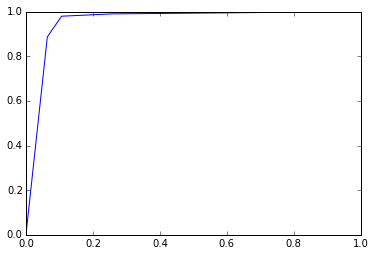

In [206]:
probabilities = neigh.fit(df_train.values, df_train.index).predict_proba(df_test.values)
fpr, tpr, thresholds = roc_curve(df_test.index, probabilities[:, 0], pos_label='democrat')
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr)
print("KNN AUC is {0}".format(roc_auc))

logistic_reg AUC is 0.995393726694


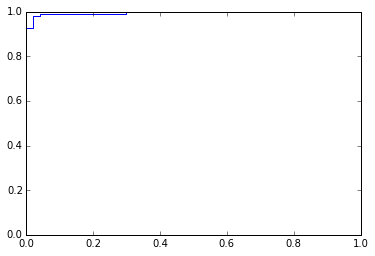

In [205]:
probabilities = logistic_reg.fit(df_train.values, df_train.index).predict_proba(df_test.values)
fpr, tpr, thresholds = roc_curve(df_test.index, probabilities[:, 0], pos_label='democrat')
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr)
print("logistic_reg AUC is {0}".format(roc_auc))


gaussian_reg AUC is 0.949989032683


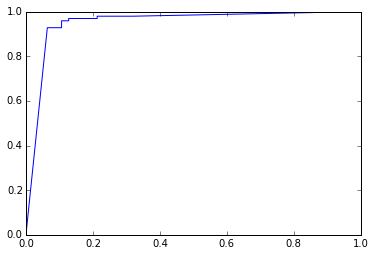

In [204]:
probabilities = gaussian_reg.fit(df_train.values, df_train.index).predict_proba(df_test.values)
fpr, tpr, thresholds = roc_curve(df_test.index, probabilities[:, 0], pos_label='democrat')
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr)
print("gaussian_reg AUC is {0}".format(roc_auc))

svc_reg AUC is 0.0026321561746


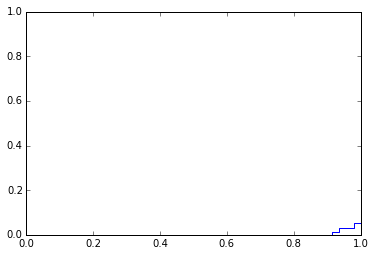

In [261]:
svc_reg.fit(df_train.values, df_train.index)
probabilities = svc_reg.fit(df_train.values, df_train.index).predict_proba(df_test.values)
fpr, tpr, thresholds = roc_curve(df_test.index, probabilities[:, 1], pos_label='democrat')
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr)
print("svc_reg AUC is {0}".format(roc_auc))

dtc_reg AUC is 0.957775828032


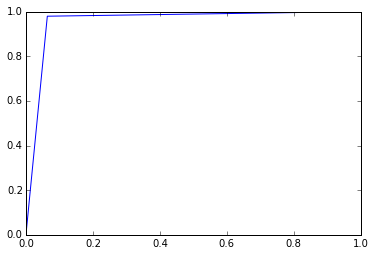

In [207]:
probabilities = dtc_reg.fit(df_train.values, df_train.index).predict_proba(df_test.values)
fpr, tpr, thresholds = roc_curve(df_test.index, probabilities[:, 0], pos_label='democrat')
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr)
print("dtc_reg AUC is {0}".format(roc_auc))

rfc_reg AUC is 0.99330993639


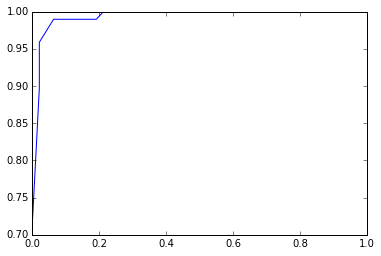

In [209]:
probabilities = rfc_reg.fit(df_train.values, df_train.index).predict_proba(df_test.values)
fpr, tpr, thresholds = roc_curve(df_test.index, probabilities[:, 0], pos_label='democrat')
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr)
print("rfc_reg AUC is {0}".format(roc_auc))

#### Challenge 3

Calculate the same metrics you did in challenge 1, but this time in a cross validation scheme with the `cross_val_score` function (like in Challenge 9)

In [254]:
from sklearn.cross_validation import cross_val_score
X=df.values
y=df.index
print np.mean(cross_val_score(KNeighborsClassifier(), X, y, scoring='accuracy'))
print np.mean(cross_val_score(KNeighborsClassifier(), X, y=='democrat', scoring='precision'))
print np.mean(cross_val_score(KNeighborsClassifier(), X, y=='democrat', scoring='recall'))
print np.mean(cross_val_score(KNeighborsClassifier(), X, y=='democrat', scoring='f1'))

0.933333333333
0.961371867646
0.928838951311
0.944804199632


In [223]:
print np.mean(cross_val_score(LogisticRegression(), X, y, scoring='accuracy'))
print np.mean(cross_val_score(LogisticRegression(), X, y=='democrat', scoring='precision'))
print np.mean(cross_val_score(LogisticRegression(), X, y=='democrat', scoring='recall'))
print np.mean(cross_val_score(LogisticRegression(), X, y=='democrat', scoring='f1'))

0.96091954023
0.970163331033
0.966292134831
0.967864264228


In [256]:
print np.mean(cross_val_score(GaussianNB(), X, y, scoring='accuracy'))
print np.mean(cross_val_score(GaussianNB(), X, y=='democrat', scoring='precision'))
print np.mean(cross_val_score(GaussianNB(), X, y=='democrat', scoring='recall'))
print np.mean(cross_val_score(GaussianNB(), X, y=='democrat', scoring='f1'))

0.931034482759
0.948219376539
0.940074906367
0.943525081974


In [255]:
print np.mean(cross_val_score(SVC(), X, y, scoring='accuracy'))
print np.mean(cross_val_score(SVC(), X, y=='democrat', scoring='precision'))
print np.mean(cross_val_score(SVC(), X, y=='democrat', scoring='recall'))
print np.mean(cross_val_score(SVC(), X, y=='democrat', scoring='f1'))

0.954022988506
0.977123246718
0.947565543071
0.961803989438


In [259]:
print np.mean(cross_val_score(RandomForestClassifier(), X, y, scoring='accuracy'))
print np.mean(cross_val_score(RandomForestClassifier(), X, y=='democrat', scoring='precision'))
print np.mean(cross_val_score(RandomForestClassifier(), X, y=='democrat', scoring='recall'))
print np.mean(cross_val_score(RandomForestClassifier(), X, y=='democrat', scoring='f1'))

0.958620689655
0.988368910783
0.943820224719
0.961944121572


#### Challenge 4

For your movie classifiers, calculate the precision and recall for each class.

#OH GOD NOT MORE MOVIES

In [262]:
movies_df = pd.DataFrame.from_csv("2013_movies.csv", infer_datetime_format=True)

In [263]:
movies_df.replace(['G','PG','PG-13','R'], [1,2,3,4], inplace=True)

In [265]:
movies_df = movies_df.dropna()

In [266]:
movies_train, movies_test = train_test_split(movies_df, test_size=0.33, random_state=42)

In [274]:
logistic_reg = LogisticRegression()
logistic_reg.fit(movies_train[['DomesticTotalGross', 'Budget', 'Runtime']].values, movies_train.Rating.values) 
log_test_results = logistic_reg.predict(movies_test[['DomesticTotalGross', 'Budget', 'Runtime']].values)
print accuracy_score(movies_test.Rating, log_test_results)
print precision_score(movies_test.Rating, log_test_results, average=None)
print recall_score(movies_test.Rating, log_test_results, average=None)

0.51724137931
[ 0.          0.57142857  0.375     ]
[ 0.    0.75  0.3 ]


#### Challenge 5

Draw the ROC curve (and calculate AUC) for the logistic regression classifier from challenge 12.

In [279]:
haberman_df = pd.DataFrame.from_csv('haberman.data.txt', header=-1, infer_datetime_format=True)

In [280]:
haberman_df = haberman_df.reset_index()
haberman_df.columns = ['age','year_of_op','nodes','survival']

In [300]:
haberman_train, haberman_test = train_test_split(haberman_df, test_size=0.33, random_state=42)

haberman_log_reg = LogisticRegression()
haberman_fit = haberman_log_reg.fit(haberman_train[['age','year_of_op','nodes']].values, haberman_train.survival.values)

In [312]:
probabilities = haberman_fit.predict_proba(haberman_test[['age','year_of_op','nodes']].values)

print probabilities[:]

[[ 0.74344169  0.25655831]
 [ 0.82753244  0.17246756]
 [ 0.79584859  0.20415141]
 [ 0.78330897  0.21669103]
 [ 0.86449649  0.13550351]
 [ 0.27663837  0.72336163]
 [ 0.79062554  0.20937446]
 [ 0.80988829  0.19011171]
 [ 0.56994059  0.43005941]
 [ 0.83321906  0.16678094]
 [ 0.70610992  0.29389008]
 [ 0.85290934  0.14709066]
 [ 0.87819639  0.12180361]
 [ 0.42522237  0.57477763]
 [ 0.84561596  0.15438404]
 [ 0.82538592  0.17461408]
 [ 0.82896526  0.17103474]
 [ 0.82463833  0.17536167]
 [ 0.56292121  0.43707879]
 [ 0.75135529  0.24864471]
 [ 0.73698594  0.26301406]
 [ 0.7875288   0.2124712 ]
 [ 0.76151766  0.23848234]
 [ 0.81827864  0.18172136]
 [ 0.75260705  0.24739295]
 [ 0.79254103  0.20745897]
 [ 0.84607803  0.15392197]
 [ 0.76967487  0.23032513]
 [ 0.67415365  0.32584635]
 [ 0.75818924  0.24181076]
 [ 0.83156089  0.16843911]
 [ 0.45904678  0.54095322]
 [ 0.81624516  0.18375484]
 [ 0.87103396  0.12896604]
 [ 0.90129837  0.09870163]
 [ 0.70042922  0.29957078]
 [ 0.83320702  0.16679298]
 

Haberman LogReg AUC is 0.621121121121


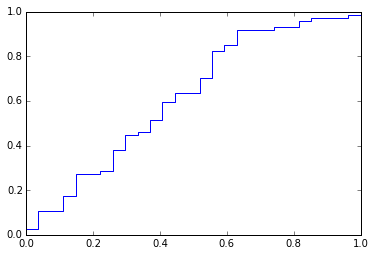

In [316]:
probabilities = haberman_fit.predict_proba(haberman_test[['age','year_of_op','nodes']].values)
fpr, tpr, thresholds = roc_curve(haberman_test.survival.values, probabilities[:, 0], pos_label=1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr)
print("Haberman LogReg AUC is {0}".format(roc_auc))